In [1]:
import pandas as pd
from numpy import random
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
%matplotlib inline

Новый датасет
Сгенерировать данные случайным образом

```text
date_in       |  customer_count  | country_code  | status
2024-01-01    |   901            | RU            | 1
2024-01-02    |   901            | US            | 2
2024-01-03    |   901            | KZ            | 3
2024-01-04    |   901            | IT            | 1
2024-01-05    |   901            | RU            | 4
2024-01-06    |   901            | RU            | 1
2024-01-01    |   901            | RU            | 1
2024-01-02    |   901            | US            | 2
2024-01-03    |   1023           | US            | 3
2024-01-04    |   901            | IT            | 1
2024-01-05    |   901            | RU            | 4
2024-01-06    |   901            | RU            | 1
```
для примера датасет для диапазона 2024-01-01 - 2024-02-28 x 4

In [2]:
def create_dataset(number): # функция генерация датасета
    result=[]               # массив с результатом
    country_codes = ['RU','Ru','US','us','KZ','IT','it','CA','Ca']  # список кодов стран
    status = [1,2,3]                                                # список статусов
    for i in range(number):                                         # цикл пробегается заданное в аргументе кол-во раз
        dates_rng = pd.date_range(start='2024-01-01', end='2024-02-28', freq='D')    # диапазон дат с частотой день
        rand_customer_count = random.randint(0,1000,len(dates_rng))                  # числа рандомные от 0 до 1000 в кол-ве, равном кол-ву дат
        rand_status = [status[random.randint(0,len(status))] for i in range(0,len(dates_rng))]    # рандомные статусы
        rand_country_code = [country_codes[random.randint(0,len(country_codes))] for i in range(0,len(dates_rng))] # рандомные коды стран согласно списка
        result.extend(zip(dates_rng,rand_customer_count,rand_country_code,rand_status)) # zip делает кортежи для последующего преобразования
    return result

In [3]:
dataset = create_dataset(number=4)
df = pd.DataFrame(data=dataset, columns=['date_in','customer_count','country_code','status'])
df

,date_in,customer_count,country_code,status
0,2024-01-01,989,Ru,2
1,2024-01-02,40,RU,3
2,2024-01-03,792,it,2
3,2024-01-04,230,US,1
4,2024-01-05,860,it,1
...,...,...,...,...
231,2024-02-24,679,US,1
232,2024-02-25,536,it,3
233,2024-02-26,477,it,2
234,2024-02-27,721,KZ,1


In [4]:
df.to_excel('company_stats2.xlsx',index=False)

In [5]:
df = pd.read_excel('company_stats.xlsx',0, index_col='date_in')
df.head()

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-04,918,US,3
2024-01-05,743,RU,1


In [6]:
df.index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26',
               '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', name='date_in', length=236, freq=None)

In [7]:
df.dtypes

customer_count     int64
country_code      object
status             int64
dtype: object

In [8]:
df['country_code'] = [i.upper() for i in df['country_code']] # 1 способ перевести в верхний регистр кодов стран

In [9]:
df['country_code'] = df.country_code.apply(lambda x: x.upper()) # 2 способ перевести в верхний регистр кодов стран

In [10]:
df

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-04,918,US,3
2024-01-05,743,RU,1
...,...,...,...
2024-02-24,841,CA,2
2024-02-25,51,IT,1
2024-02-26,331,US,2


In [11]:
filter_status = df['status']==1 # сортировка по статусам = 1, создание фильтра
df2 = df[filter_status]
#df2 = df[df['status'] == 1] # 2 способ
df2

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-05,743,RU,1
2024-01-15,179,CA,1
...,...,...,...
2024-02-19,689,RU,1
2024-02-22,890,RU,1
2024-02-23,96,IT,1


In [12]:
filter_country = df['country_code']=='RU' # сортировка по коду страны = 'RU', создание фильтра
df3 = df[filter_country]
df3

,customer_count,country_code,status
date_in,,,
2024-01-02,709,RU,1
2024-01-05,743,RU,1
2024-01-07,573,RU,2
2024-01-09,445,RU,2
2024-01-17,216,RU,1
2024-01-18,685,RU,1
2024-01-22,789,RU,2
2024-01-24,354,RU,1
2024-01-25,594,RU,1


In [13]:
df['country_code'].unique()

array(['KZ', 'RU', 'US', 'IT', 'CA'], dtype=object)

<Axes: xlabel='date_in'>

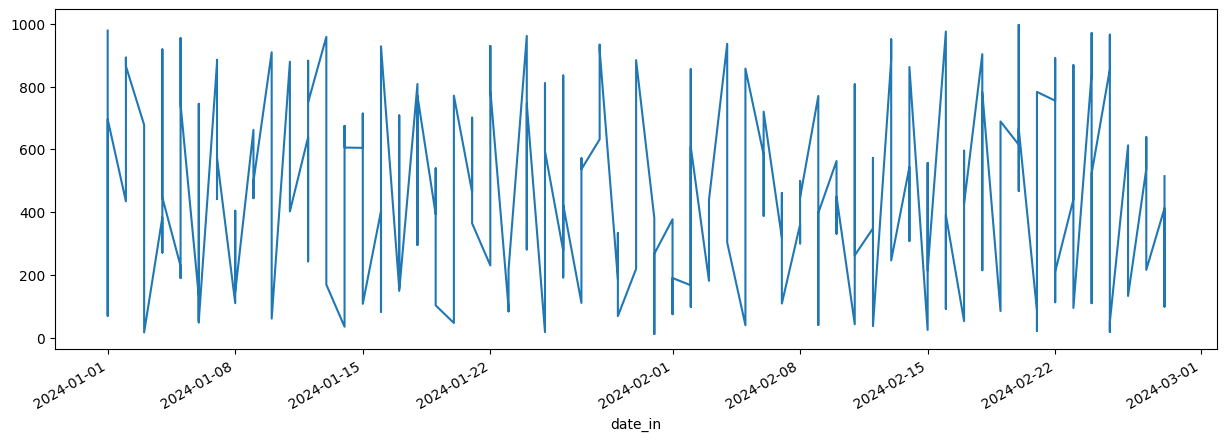

In [14]:
df['customer_count'].plot(figsize = (15,5))

In [15]:
daily_data = df.reset_index().groupby(['country_code','date_in']).sum() #группировка по 2 столбцам(по дате+кодам стран) и проссумирован + сброшены индексы
daily_data

customer_count  status
country_code date_in                           
CA           2024-01-03             131       2
             2024-01-06             795       5
             2024-01-07             885       1
             2024-01-09             518       3
             2024-01-10             971       5
...                                 ...     ...
US           2024-02-19             340       2
             2024-02-20             615       2
             2024-02-24             111       3
             2024-02-26             331       2
             2024-02-27             217       3

[171 rows x 2 columns]

In [16]:
daily_data.drop(['status'], axis=1) # убрали столбец статус
del daily_data['status']

In [17]:
daily_data.index

MultiIndex([('CA', '2024-01-03'),
            ('CA', '2024-01-06'),
            ('CA', '2024-01-07'),
            ('CA', '2024-01-09'),
            ('CA', '2024-01-10'),
            ('CA', '2024-01-11'),
            ('CA', '2024-01-13'),
            ('CA', '2024-01-14'),
            ('CA', '2024-01-15'),
            ('CA', '2024-01-19'),
            ...
            ('US', '2024-02-13'),
            ('US', '2024-02-15'),
            ('US', '2024-02-16'),
            ('US', '2024-02-17'),
            ('US', '2024-02-18'),
            ('US', '2024-02-19'),
            ('US', '2024-02-20'),
            ('US', '2024-02-24'),
            ('US', '2024-02-26'),
            ('US', '2024-02-27')],
           names=['country_code', 'date_in'], length=171)

In [18]:
daily_data.index.dtypes

country_code            object
date_in         datetime64[ns]
dtype: object

In [19]:
daily_data.index.levels[0]

Index(['CA', 'IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [20]:
daily_data.index.levels[1]

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [21]:
daily_data

customer_count
country_code date_in                   
CA           2024-01-03             131
             2024-01-06             795
             2024-01-07             885
             2024-01-09             518
             2024-01-10             971
...                                 ...
US           2024-02-19             340
             2024-02-20             615
             2024-02-24             111
             2024-02-26             331
             2024-02-27             217

[171 rows x 1 columns]

<Axes: xlabel='date_in'>

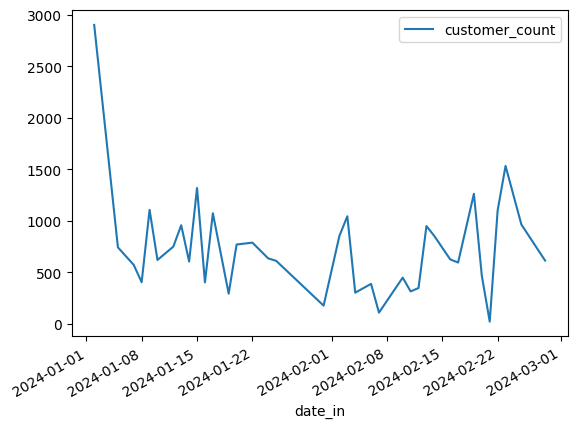

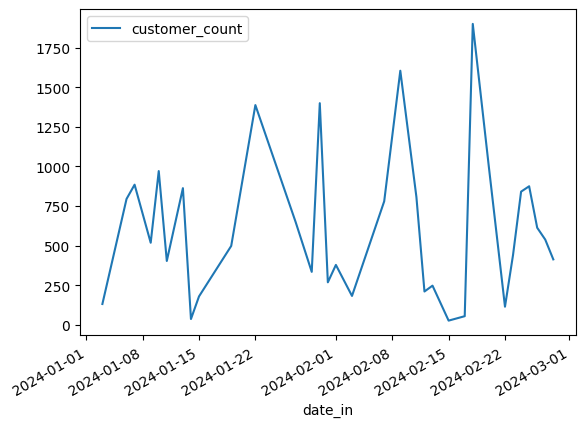

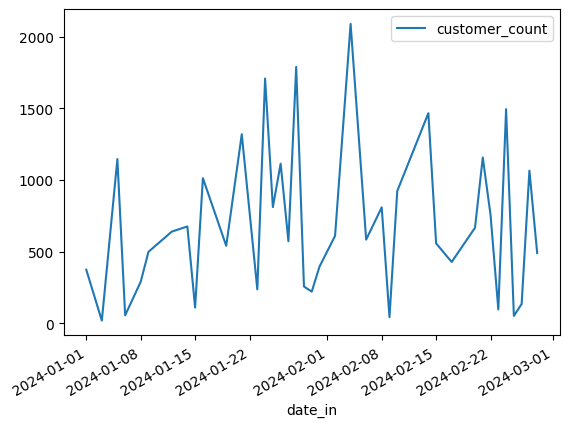

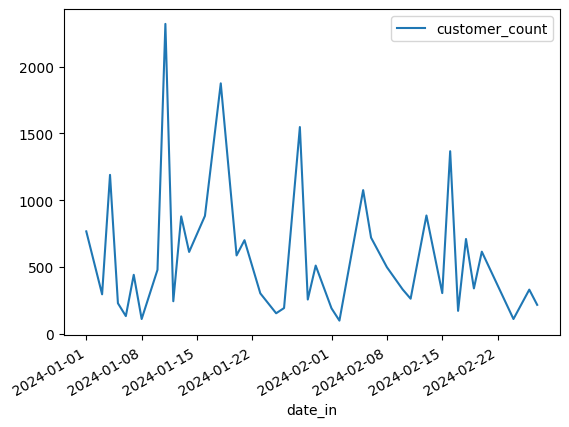

In [22]:
daily_data.loc['RU'].plot() # loc обращается к str значению, iloc к индексу строки
daily_data.loc['CA'].plot()
daily_data.loc['IT'].plot()
daily_data.loc['US'].plot()

<Axes: xlabel='date_in'>

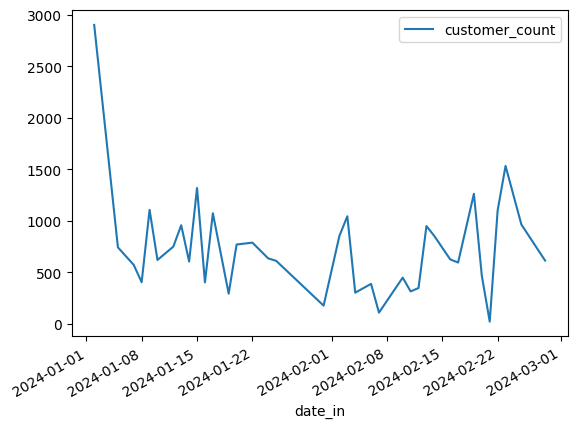

In [23]:
daily_data.loc['RU']['2024':].plot() # по стране и году


In [24]:
group_y_m = daily_data.groupby([daily_data.index.get_level_values(0),daily_data.index.get_level_values(1).year,daily_data.index.get_level_values(1).month]) # группировка по стране,году и месяцу через индексы
daily_data['lower'] = group_y_m['customer_count'].transform(lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['upper'] = group_y_m['customer_count'].transform(lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['outlier'] = (daily_data['customer_count'] < daily_data['lower']) | (daily_data['customer_count'] > daily_data['upper'])

In [25]:
daily_data.index.get_level_values(1).year

Index([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='date_in', length=171)

In [26]:
daily_data.index.get_level_values(1).month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype='int32', name='date_in', length=171)

In [27]:
daily_data.index.get_level_values(0)

Index(['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       ...
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
      dtype='object', name='country_code', length=171)

In [28]:
daily_data = daily_data[daily_data['outlier'] == False]
daily_data.head(20)

customer_count   lower   upper  outlier
country_code date_in                                            
CA           2024-01-03             131 -709.00  1884.0    False
             2024-01-06             795 -709.00  1884.0    False
             2024-01-07             885 -709.00  1884.0    False
             2024-01-09             518 -709.00  1884.0    False
             2024-01-10             971 -709.00  1884.0    False
             2024-01-11             403 -709.00  1884.0    False
             2024-01-13             863 -709.00  1884.0    False
             2024-01-14              36 -709.00  1884.0    False
             2024-01-15             179 -709.00  1884.0    False
             2024-01-19             498 -709.00  1884.0    False
             2024-01-22            1388 -709.00  1884.0    False
             2024-01-27             649 -709.00  1884.0    False
             2024-01-29             334 -709.00  1884.0    False
             2024-01-30            1400 -709.00  1884.0    False
             2024-01-31             268 -709.00  1884.0    False
             2024-02-01             378 -810.25  1862.0    False
             2024-02-03             182 -810.25  1862.0    False
             2024-02-07             780 -810.25  1862.0    False
             2024-02-09            1605 -810.25  1862.0    False
             2024-02-11             807 -810.25  1862.0    False

In [29]:
all_df = pd.DataFrame(daily_data['customer_count'].groupby(daily_data.index.get_level_values(1)).sum())
all_df.columns = ['customer_count']
all_df

,customer_count
date_in,
2024-01-01,2118
2024-01-03,1123
2024-01-04,2021
2024-01-05,2117
2024-01-06,983
2024-01-07,2775
2024-01-08,951
2024-01-09,2123
2024-01-10,2071


In [30]:
year_monty = all_df.groupby([lambda x: x.year, lambda x: x.month])
all_df['max'] = year_monty['customer_count'].transform(lambda x: x.max())
all_df.head()

,customer_count,max
date_in,,
2024-01-01,2118,3336
2024-01-03,1123,3336
2024-01-04,2021,3336
2024-01-05,2117,3336
2024-01-06,983,3336


In [31]:
data = [1000,2000,3000]
idx = pd.date_range(start='2022-01-01',end='2025-01-01',freq='A')
BAG = pd.DataFrame(data, index=idx, columns=['BAG'])
BAG

,BAG
2022-12-31,1000
2023-12-31,2000
2024-12-31,3000


In [32]:
combined = pd.concat([all_df,BAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,customer_count,max,BAG
2024-02-25,1891.0,2745.0,NaN
2024-02-26,1517.0,2745.0,NaN
2024-02-27,1819.0,2745.0,NaN
2024-02-28,1517.0,2745.0,NaN
2024-12-31,NaN,NaN,3000.0


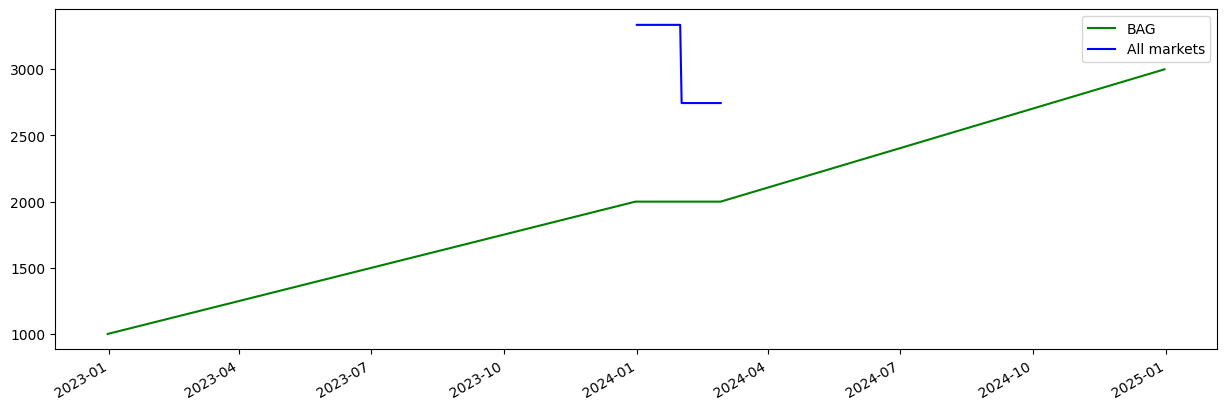

In [33]:
fig,axes = plt.subplots(figsize=(15,5))

combined['BAG'].fillna(method='pad').plot(color='green', label='BAG')
combined['max'].plot(color='blue', label='All markets')

plt.legend(loc='best')

In [34]:
year = combined.groupby(lambda x: x.year).max()
year

,customer_count,max,BAG
2022,NaN,NaN,1000.0
2023,NaN,NaN,2000.0
2024,3336.0,3336.0,3000.0


In [35]:
year['max'] = [2022,2023,3336.0]

In [36]:
year

,customer_count,max,BAG
2022,NaN,2022.0,1000.0
2023,NaN,2023.0,2000.0
2024,3336.0,3336.0,3000.0


In [38]:
year['yr_pct_change'] = year['max'].pct_change(periods=1)
year

,customer_count,max,BAG,yr_pct_change
2022,NaN,2022.0,1000.0,NaN
2023,NaN,2023.0,2000.0,0.000495
2024,3336.0,3336.0,3000.0,0.649036


----------------------------------6 Day --------------------------------------